# CA2 - Supervised machine learning classification pipeline - applied to medical data

## Part I: Data loading and data exploration

### Import necessary libraries/modules:

In [17]:
# Insert your code below
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.classifier import Perceptron, Adaline, LogisticRegression
import seaborn as sns


### Loading and exploring data

1. Load the dataset `fetal_health.csv` with `pandas`. Use the first column as the row index.
2. Check for missing data, report on your finding and remove samples with missing data, if you find any.
3. Display the raw data with appropriate plots/outputs and inspect it. Describe the distributions of the values of feature `"baseline value"`, `"accelerations"`, and the target variable `"fetal_health"`.
4. Will it be beneficial to scale the data? Why or why not?
5. Is the data linearly separable using a combination of any two pairs of features? Can we expect an accuracy close to 100% from a linear classifier?

In [18]:
# Insert your code below
# ======================
# 1 
c # set the first column as row index
df.head() # view first five rows

baseline value  accelerations  prolongued_decelerations  \
1584           132.0          0.000                       0.0   
942            136.0          0.003                       0.0   
1376           121.0          0.006                       0.0   
169            116.0          0.001                       0.0   
1293           115.0          0.006                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1584                             35.0                                   1.3   
942                              54.0                                   0.7   
1376                             24.0                                   1.7   
169                              46.0                                   0.7   
1293                             19.0                                   1.7   

      percentage_of_time_with_abnormal_long_term_variability  histogram_mean  \
1584                                                0.0                135.0   
942                                                15.0                141.0   
1376                                                0.0                121.0   
169                                                39.0                120.0   
1293                                                0.0                121.0   

      histogram_variance  fetal_health  
1584                 9.0             0  
942                  8.0             0  
1376                25.0             0  
169                  1.0             0  
1293                 9.0             0

In [19]:
# 2
df_NaN = df.isna() # rows containing missing data
print(df_NaN.sum()) # view missing data -> there is None

baseline value                                            0
accelerations                                             0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
histogram_mean                                            0
histogram_variance                                        0
fetal_health                                              0
dtype: int64


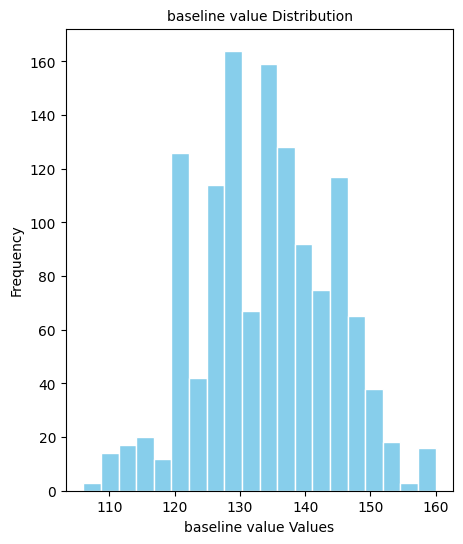

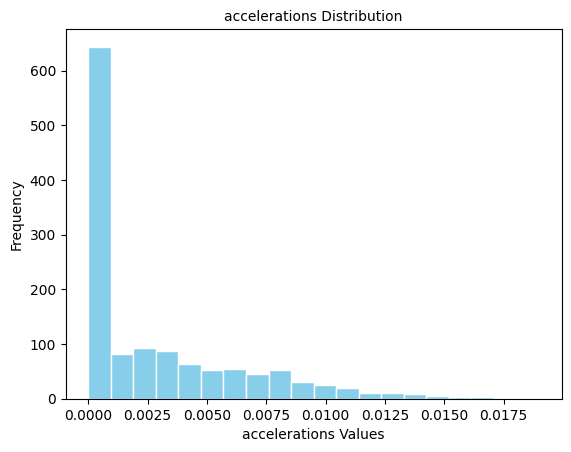

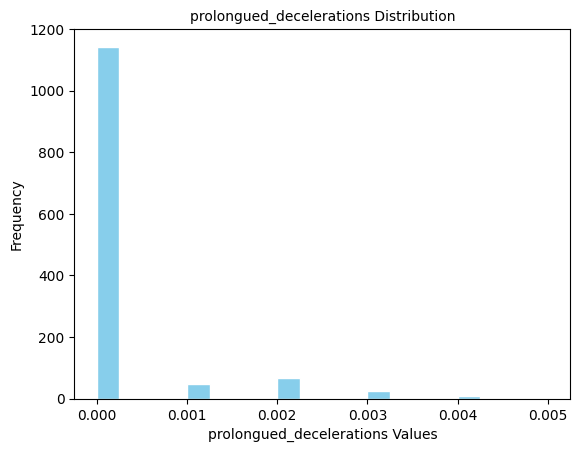

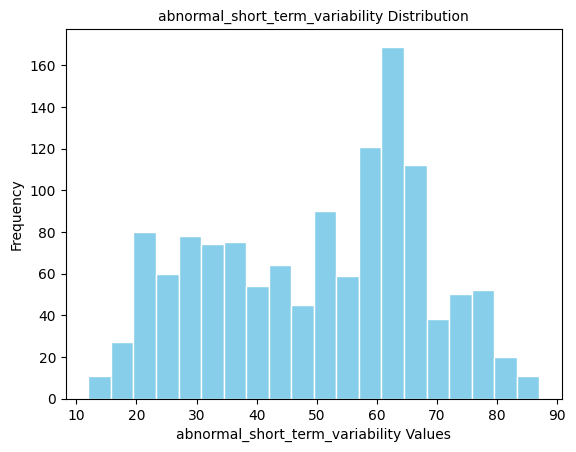

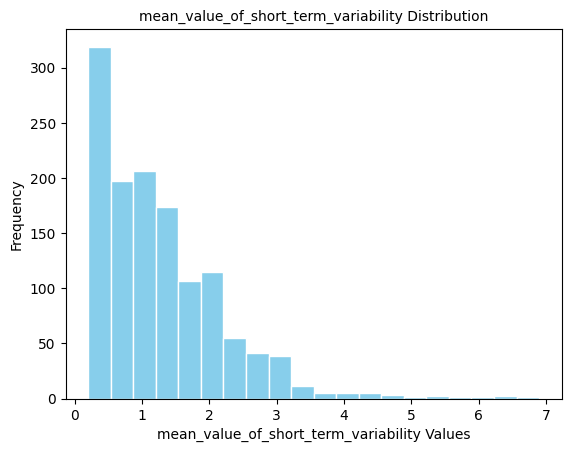

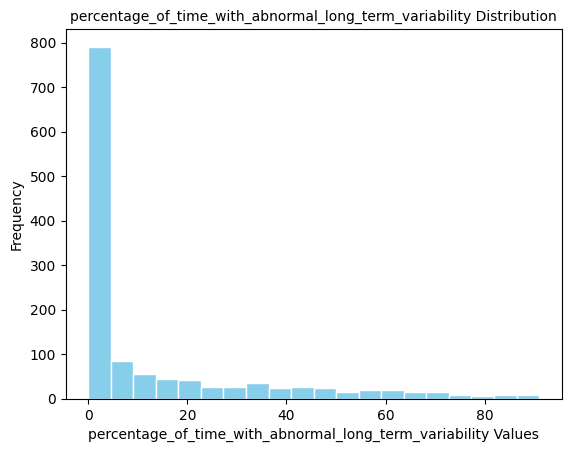

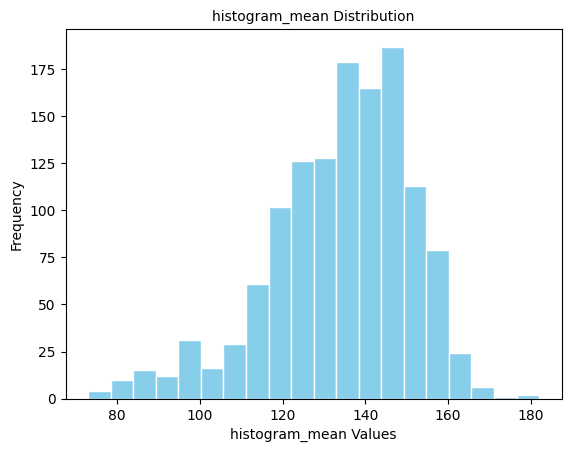

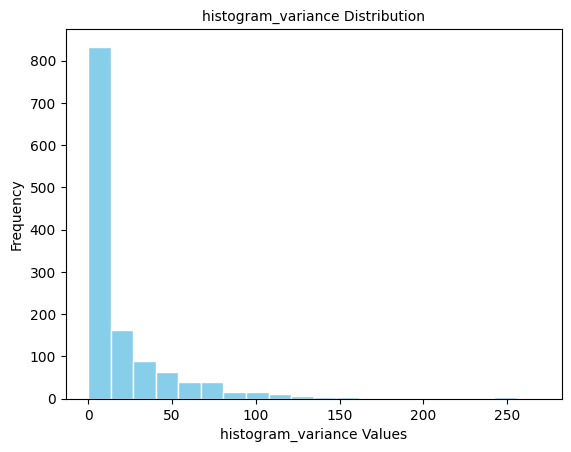

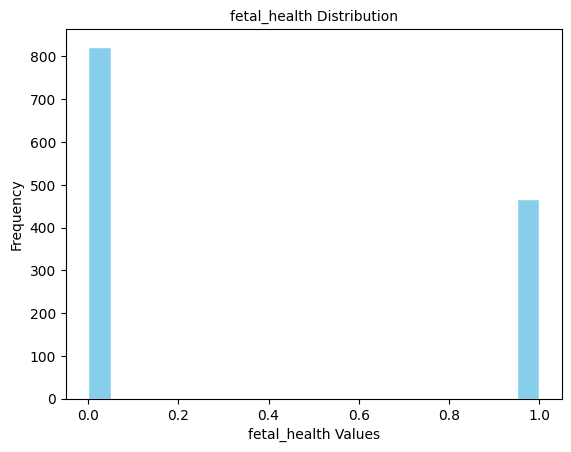

In [20]:
# 3
plt.figure(figsize = (5,6)) # alter the size, to makes the output look nicer

titels = list(df.columns) #makes a list with the headers from the dataframe
for idx, colname in enumerate(titels):
    plt.hist(df[colname], bins=20, color="skyblue", edgecolor="white") # changed color and added edgecolor to make it nicer
    plt.title(f'{colname} Distribution', fontsize = 10) # Title
    plt.xlabel(f'{colname} Values')# x-axis title w
    plt.ylabel('Frequency') # y-axis title
    plt.show()  




3.  
    - Baseline value : describes the fetal heart rate in beats per minute. it is distrubuted almost as a normal distribution.
    - Acceleration: number of acceleration per minute, the distrubution is skewed right and the majority obseerved where 0.0.
    - Fetal health : the fetal health categorized into 0(normal) og 1(not normal). Most of them are 0


4. Will it be beneficial to scale the data? Why or why not?
    - Yes, it would be beneficical to scale the data. this ois beacuse it makes the ontra variance smaller and for example the baseline, to nomalize this, the extreme values could be -1 and 1, versus 110 and 160. The calculations of Wx +b will be much easier then.


5. Is the data linearly separable using a combination of any two pairs of features? Can we expect an accuracy close to 100% from a linear classifier?
    - It is not perfect linearly separable. Looking at the plot below, you can see that its hard to draw a line that separates the classes completaly, therefor we can not expect an accuancy close to 100% from linear classifier.


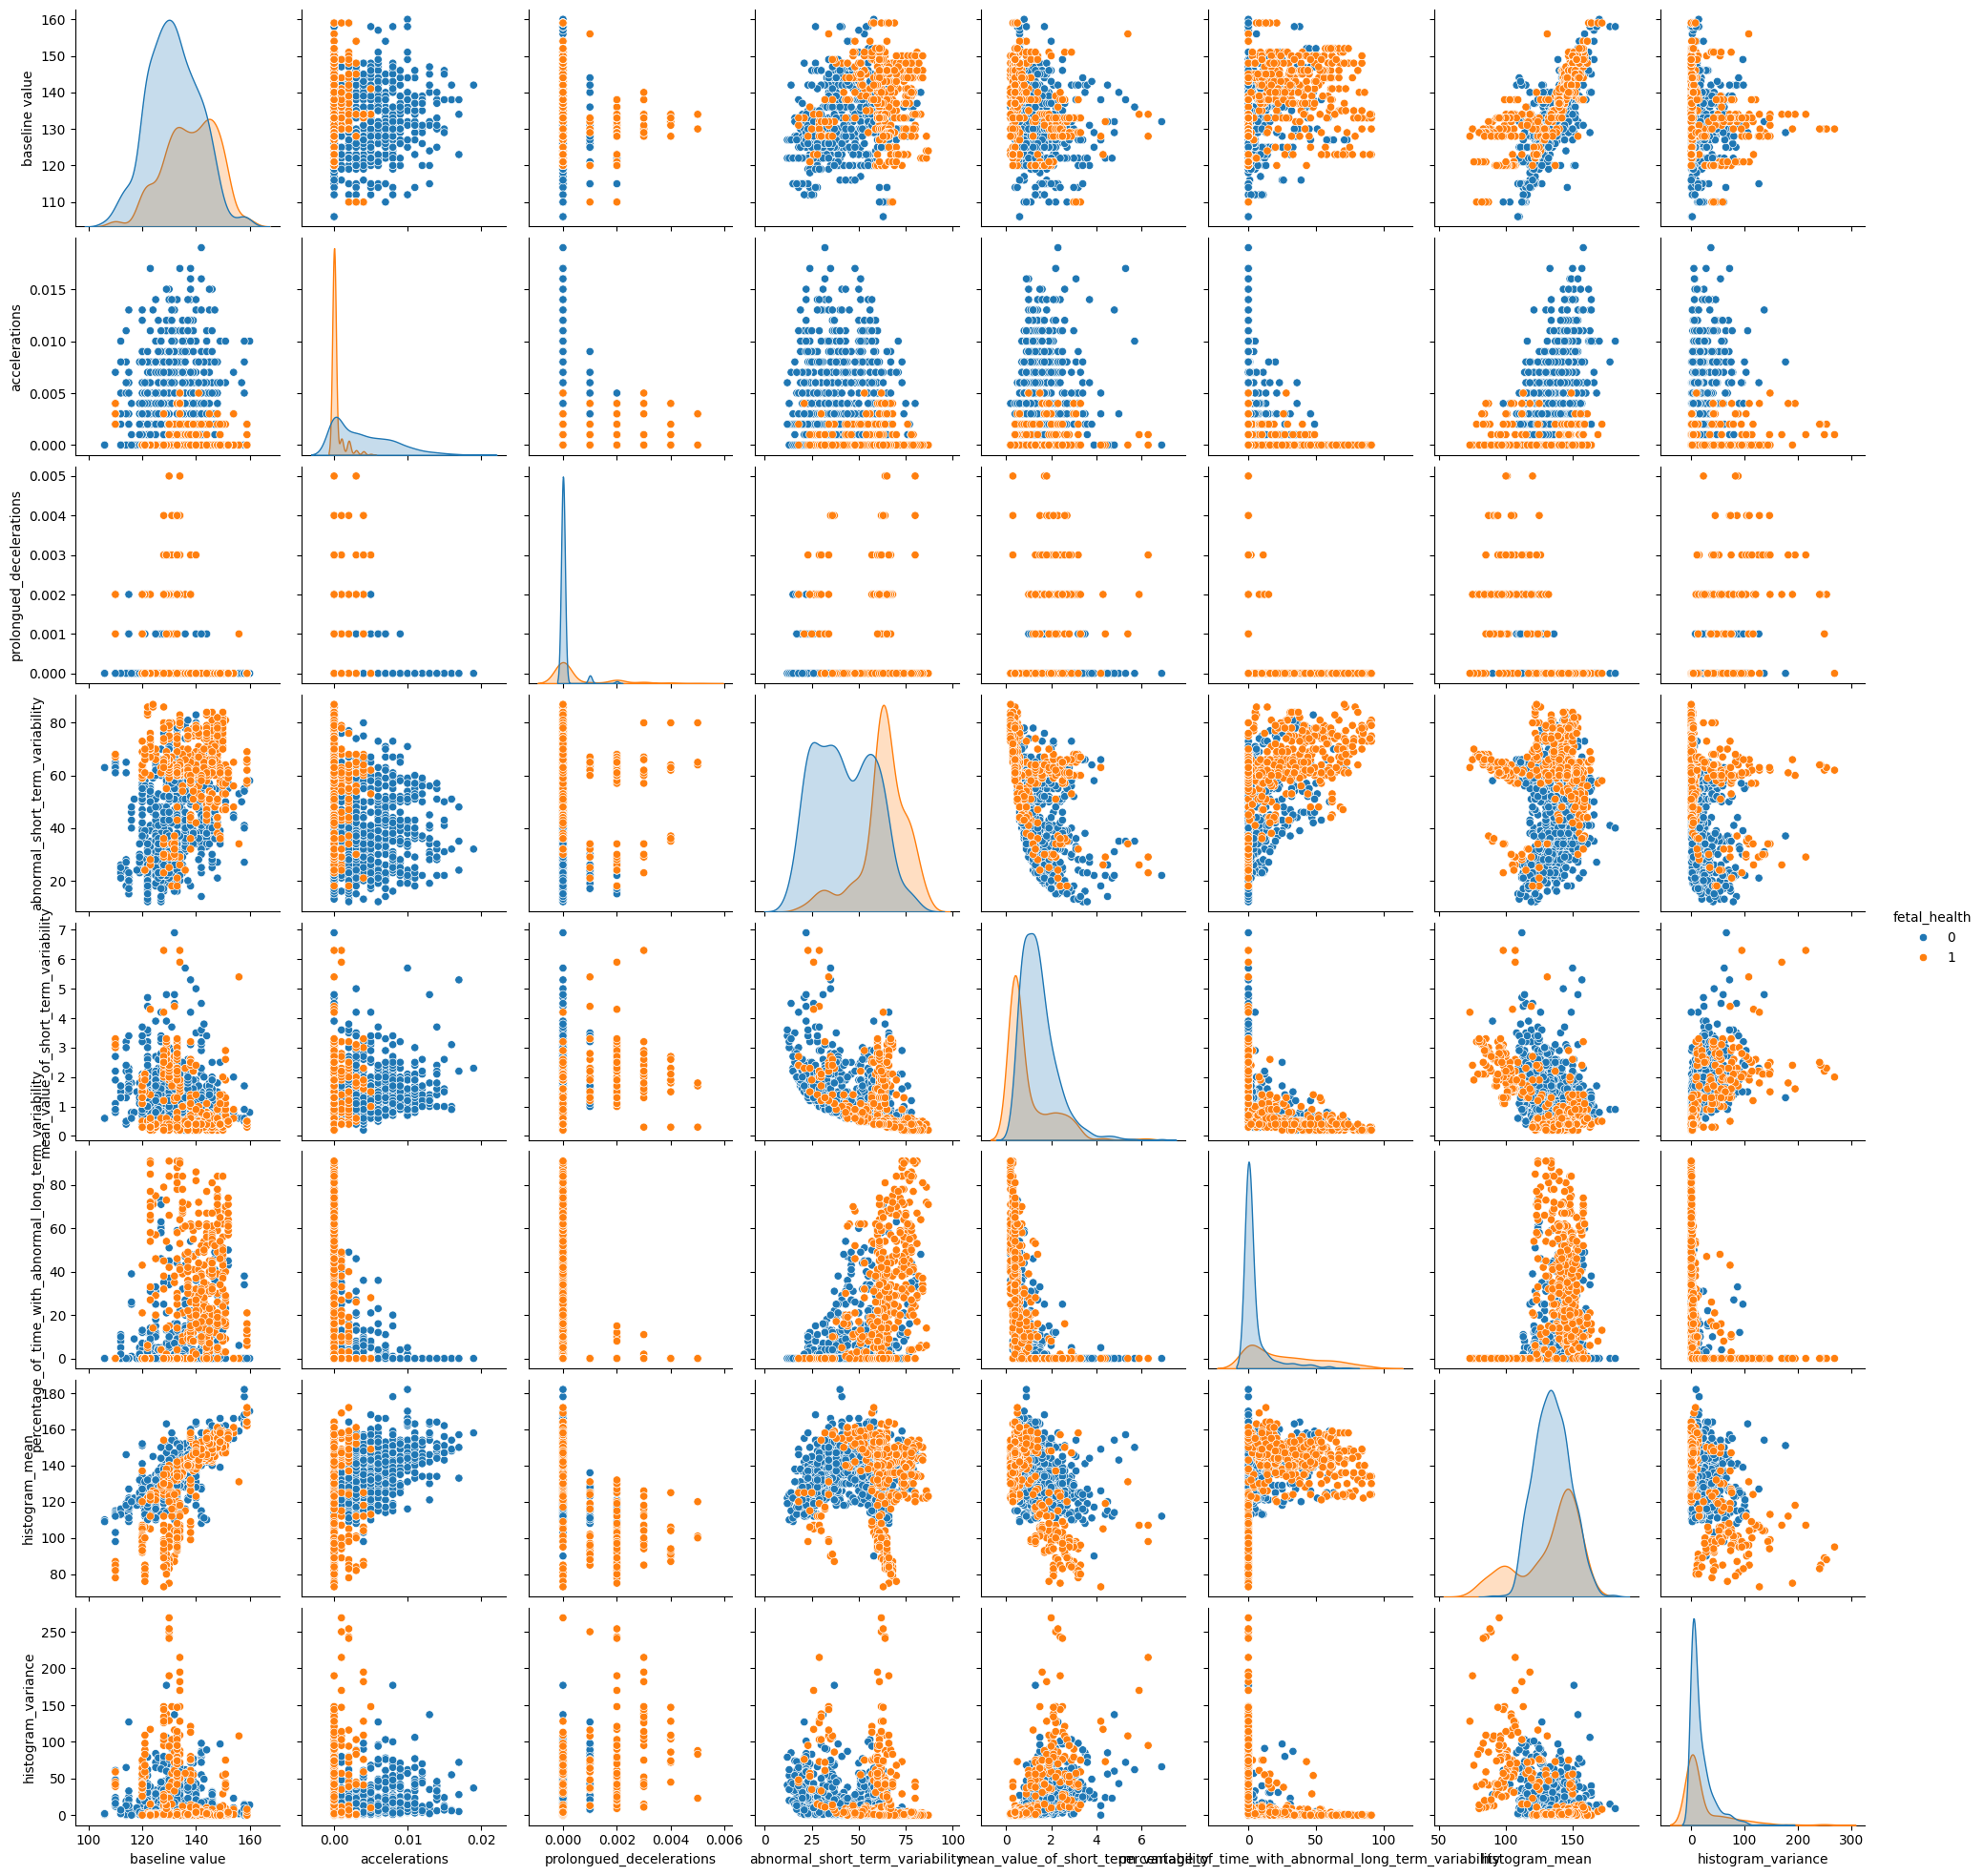

In [21]:
# 5 
sns.pairplot(data=df, hue = 'fetal_health')
plt.show()

## Part II: Train/Test Split

Divide your dataset into training and testing subsets. Follow these steps to create the split:

1. **Divide the dataset into two data sets, each data set only contains samples of either class 0 or class 1:**
- Create a DataFrame `df_0` containing all data with `"fetal_health"` equal to 0.
- Create a DataFrame `df_1` containing all data with `"fetal_health"` equal to 1.

2. **Split into training and test set by randomly sampling entries from the data frames:**
- Create a DataFrame `df_0_train` containing by sampling `75%` of the entries from `df_0` (use the `sample` method of the data frame, fix the `random_state` to `42`).
- Create a DataFrame `df_1_train` using the same approach with `df_1`.
- Create a DataFrame `df_0_test` containing the remaining entries of `df_0` (use `df_0.drop(df_0_train.index)` to drop all entries except the previously extracted ones).
- Create a DataFrame `df_1_test` using the same approach with `df_1`.

3. **Merge the datasets split by classes back together:**
- Create a DataFrame `df_train` containing all entries from `df_0_train` and `df_1_train`. (Hint: use the `concat` method you know from CA1)
- Create a DataFrame `df_test` containing all entries from the two test sets.

4. **Create the following data frames from these splits:**
- `X_train`: Contains all columns of `df_train` except for the target feature `"fetal_health"`
- `X_test`: Contains all columns of `df_test` except for the target feature `"fetal_health"`
- `y_train`: Contains only the target feature `"fetal_health"` for all samples in the training set
- `y_test`: Contains only the target feature `"fetal_health"` for all samples in the test set

5. **Check that your sets have the expected sizes/shape by printing number of rows and colums ("shape") of the data sets.**
- (Sanity check: there should be 8 features, almost 1000 samples in the training set and slightly more than 300 samples in the test set.)


6. **Explain the purpose of this slightly complicated procedure. Why did we first split into the two classes? Why did we then split into a training and a testing set?**


7. **What is the share (in percent) of samples with class 0 label in test and training set, and in the intial data set?**



In [22]:
# Insert your code below
# ======================

# 1
df_0 = df[df['fetal_health'] == 0]
df_1 = df[df['fetal_health'] == 1]

In [23]:
# 2 Split into training and test set by randomly sampling entries from the data frames:
df_0_train = df_0.sample(frac = 0.75, random_state = 42)
df_1_train = df_1.sample(frac = 0.75, random_state = 42)

df_0_test = df_0.sample(frac = 0.75, random_state = 42)
df_1_test = df_1.sample(frac = 0.75, random_state = 42)

df_0_test = df_0.drop(df_0_train.index)
df_1_test = df_1.drop(df_1_train.index)

In [24]:
# 3. Merge the datasets split by classes back together:
df_train = pd.concat([df_0_train, df_1_train])
df_test = pd.concat([df_0_test, df_1_test])

In [25]:
# 4 
X_train = df_train.drop(columns=["fetal_health"])
X_test = df_test.drop(columns=["fetal_health"])
y_train = df_train['fetal_health']
y_test = df_test['fetal_health']


In [26]:
# 5 shape of test and train sets
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)



(967, 8)
(323, 8)
(967,)
(323,)


6. The purpose of first splitt into two classes is to undertand the patterns in the data and train the model on a portion of the data, and evaluate the preformance on unseen data to check and assess the capasity to generalize.

In [27]:
# 7 Calculate the share of samples with class 0 

train_0_share = (y_train == 0).mean() * 100
test_0_share = (y_test == 0).mean() * 100
initial_0_share = (df['fetal_health'] == 0).mean() * 100


print("{:.1f}%".format(train_0_share))
print("{:.1f}%".format(test_0_share))
print("{:.1f}%".format(initial_0_share))


63.8%
63.8%
63.8%


### Convert data to numpy arrays and shuffle the training data

Many machine learning models (including those you will work with later in the assignment) will not accept DataFrames as input. Instead, they will only work if you pass numpy arrays containing the data.
Here, we convert the DataFrames `X_train`, `X_test`, `y_train`, and `y_test` to numpy arrays `X_train`, `X_test`, `y_train`, and `y_test`.

Moreover we shuffle the training data. This is important because the training data is currently ordered by class. In Part IV, we use the first n samples from the training set to train the classifiers. If we did not shuffle the data, the classifiers would only be trained on samples of class 0.

Nothing to be done here, just execute the cell.

In [28]:
# convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# shuffle training data
np.random.seed(42) # for reproducibility
shuffle_index = np.random.permutation(len(X_train)) # generate random indices
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # shuffle data by applying reordering with the random indices

## Part III: Scaling the data

1. Standardize the training _and_ test data so that each feature has a mean of 0 and a standard deviation of 1.
2. Check that the scaling was successful
    - by printing the mean and standard deviation of each feature in the scaled training set
    - by putting the scaled training set into a DataFrame and make a violin plot of the data

__Hint:__ use the `axis` argument to calculate mean and standard deviation column-wise.

__Important:__ Avoid data leakage!

__More hints:__

1. For each column, subtract the mean $(\mu)$ of each column from each value in the column
2. Divide the result by the standard deviation $(\sigma)$ of the column

(You saw how to do both operations in the lecture. If you don't remember, you can look it up in Canvas files.)

Mathematically (in case this is useful for you), this transformation can be represented for each column as follows:

$$ X_\text{scaled} = \frac{(X - \mu)}{\sigma} $$

where:
- $(X_\text{scaled})$ are the new, transformed column values (a column-vector)
- $(X)$ is the original values
- $(\mu)$ is the mean of the column
- $(\sigma)$ is the standard deviation of the column



Mean of each feature in the scaled training set: 
[-1.05396560e-16  3.84375974e-15 -3.17337791e-16  1.30195751e-16
 -6.05915410e-17 -3.18026658e-16 -3.16763736e-16 -3.23767211e-17]

Standard deviation of each feature in the scaled training set: [1. 1. 1. 1. 1. 1. 1. 1.]


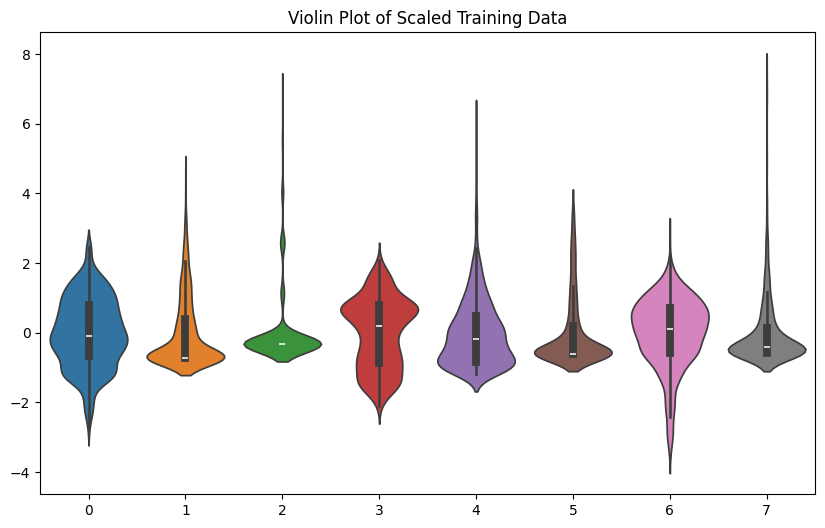

In [29]:
# Insert your code below
# ======================

# 1 Standarize the training and test data
X_train_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0, ddof=1)
X_test_scaled = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0, ddof=1)

# Double-check mean and std of the scaled X_train
X_train_sc_mean = np.mean(X_train_scaled, axis=0)
X_train_sc_std = np.std(X_train_scaled, axis=0, ddof=1)

print(f'Mean of each feature in the scaled training set: \n{X_train_sc_mean}')
print()
print(f'Standard deviation of each feature in the scaled training set: {X_train_sc_std}')

df_scaled_train = pd.DataFrame(X_train_scaled)
# Making a violin plot
plt.figure(figsize=(10, 6))
plt.title('Violin Plot of Scaled Training Data')
sns.violinplot(data=df_scaled_train)
plt.show()


## Part IV: Training and evaluation with different dataset sizes and training times

Often, a larger dataset size will yield better model performance. (As we will learn later, this usually prevents overfitting and increases the generalization capability of the trained model.)
However, collecting data is usually rather expensive.

In this part of the exercise, you will investigate

- how the model performance changes with varying dataset size
- how the model performance changes with varying numbers of epochs/iterations of the optimizer/solver (increasing training time).

For this task (Part IV), use the `Adaline`, `Perceptron`, and `LogisticRegression` classifier from the `mlxtend` library. All use the gradient descent (GD) algorithm for training.

__Important__: Use a learning rate of `1e-4` (`0.0001`) for all classifiers, and use the argument `minibatches=1` when initializing `Adaline` and `LogisticRegression` classifier (this will make sure it uses GD). For all three classifiers, pass `random_seed=42` when initializing the classifier to ensure reproducibility of the results.

### Model training

Train the model models using progressively larger subsets of your dataset, specifically: first 50 rows, first 100 rows, first 150 rows, ..., first 650 rows, first 700 rows (in total $14$ different variants).

For each number of rows train the model with progressively larger number of epochs: 2, 7, 12, 17, ..., 87, 92, 97 (in total $20$ different model variants).

The resulting $14 \times 20 = 280$ models obtained from the different combinations of subsets and number of epochs. An output of the training process could look like this:

```
Model (1) Train a model with first 50 rows of data for 2 epochs
Model (2) Train a model with first 50 rows of data for 7 epochs
Model (3) Train a model with first 50 rows of data for 12 epochs
...
Model (21) Train a model with first 100 rows of data for 2 epochs
Model (22) Train a model with first 100 rows of data for 7 epochs
...
Model (279) Train a model with first 700 rows of data for 92 epochs
Model (280) Train a model with first 700 rows of data for 97 epochs
```

### Model evaluation

For each of the $280$ models, calculate the __accuracy on the test set__ (do __not__ use the score method but compute accuracy yourself).
Store the results in the provided 2D numpy array (it has $14$ rows and $20$ columns).
The rows of the array correspond to the different dataset sizes, and the columns correspond to the different numbers of epochs.

### Tasks
1. Train the $280$ Adaline classifiers as mentioned above and calculate the accuracy for each of the $280$ variants.
2. Generalize your code so that is doing the same procedure for all three classifiers: `Perceptron`, `Adaline`, and `LogisticRegression` after each other. Store the result for all classifiers. You can for example use an array of shape $3\times14\times20$ to store the accuracies of the three classifiers.

Note that executing the cells will take some time (but on most systems it should not be more than 5 minutes).

In [30]:
# Train and evaluate all model variants
# Insert your code below

# Define parameters
eta = 0.0001
minibatches = 1
random_seed = 42
dataset_sizes = np.arange(50, 701, 50) # 14 rows
num_epochs = np.arange(2, 98, 5) # 20 columns
model_idx = 1

# Initialize classifiers
all_accuracies = np.zeros((3, len(dataset_sizes), len(num_epochs))) # Stores the accuracies

# Loop over dataset sizes
for size_idx, size in enumerate(dataset_sizes):
    X_subset = X_train_scaled[:size]
    y_subset = y_train[:size]
    # Loop over number of epochs
    for epoch_idx, epochs in enumerate(num_epochs):
        perceptron = Perceptron(eta=eta, random_seed=random_seed, epochs = epochs)
        perceptron.fit(X_subset, y_subset) # Train the classifier
        y_pred = perceptron.predict(X_test_scaled)   # Make predictions on the test set
        accuracy = np.mean(y_pred == y_test)  # Calculates the accuracy
        all_accuracies[0][size_idx][epoch_idx] = accuracy  # Stores the accuracy in all_accuracies
        print(f"Model ({model_idx}) - Percetron - Train a model with first {size} rows of data for {epochs} epochs. Accuracy: {accuracy:.2f}")
        model_idx += 1

        adaline = Adaline(eta=eta, minibatches=minibatches, random_seed=random_seed, epochs=epochs)
        adaline.fit(X_subset, y_subset) # Train the classifier
        y_pred = adaline.predict(X_test_scaled)   # Make predictions on the test set
        accuracy = np.mean(y_pred == y_test)  # Calculates the accuracy
        all_accuracies[1][size_idx][epoch_idx] = accuracy  # Stores the accuracy in all_accuracies
        print(f"Model ({model_idx}) - Adaline - Train a model with first {size} rows of data for {epochs} epochs. Accuracy: {accuracy:.2f}")
        model_idx += 1

        LR = LogisticRegression(eta=eta, minibatches=minibatches, random_seed=random_seed, epochs = epochs)
        LR.fit(X_subset, y_subset) # Train the classifier
        y_pred = LR.predict(X_test_scaled)   # Make predictions on the test set
        accuracy = np.mean(y_pred == y_test)  # Calculates the accuracy
        all_accuracies[2][size_idx][epoch_idx] = accuracy  # Stores the accuracy in all_accuracies

        print(f"Model ({model_idx}) - Linear Regression - Train a model with first {size} rows of data for {epochs} epochs. Accuracy: {accuracy:.2f}")
        model_idx += 1 # update model ID



Model (1) - Percetron - Train a model with first 50 rows of data for 2 epochs. Accuracy: 0.81
Model (2) - Adaline - Train a model with first 50 rows of data for 2 epochs. Accuracy: 0.80
Model (3) - Linear Regression - Train a model with first 50 rows of data for 2 epochs. Accuracy: 0.78
Model (4) - Percetron - Train a model with first 50 rows of data for 7 epochs. Accuracy: 0.86
Model (5) - Adaline - Train a model with first 50 rows of data for 7 epochs. Accuracy: 0.85
Model (6) - Linear Regression - Train a model with first 50 rows of data for 7 epochs. Accuracy: 0.82
Model (7) - Percetron - Train a model with first 50 rows of data for 12 epochs. Accuracy: 0.86
Model (8) - Adaline - Train a model with first 50 rows of data for 12 epochs. Accuracy: 0.87
Model (9) - Linear Regression - Train a model with first 50 rows of data for 12 epochs. Accuracy: 0.85
Model (10) - Percetron - Train a model with first 50 rows of data for 17 epochs. Accuracy: 0.87
Model (11) - Adaline - Train a model 

### Performance visualization

Plot the performance measure for all classifiers (accuracy on the test set; use the result array from above) of all the $280$ variants for each classifier in a total of three heatmaps using, for example `seaborn` or `matplotlib` directly.

The color should represent the accuracy on the test set, and the x and y axes should represent the number of epochs and the dataset size, respectively.
Which one is x and which one is y is up to you to decide. Look in the example output at the top of the assignment for inspiration for how the plot could look like and how it could be labeled nicely. (But use the correct numbers corresponding to your dataset sizes and number of epochs.)

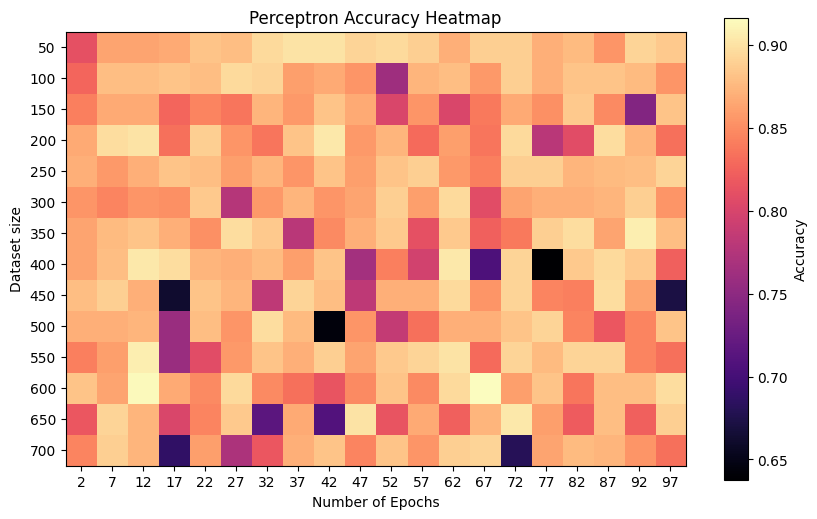

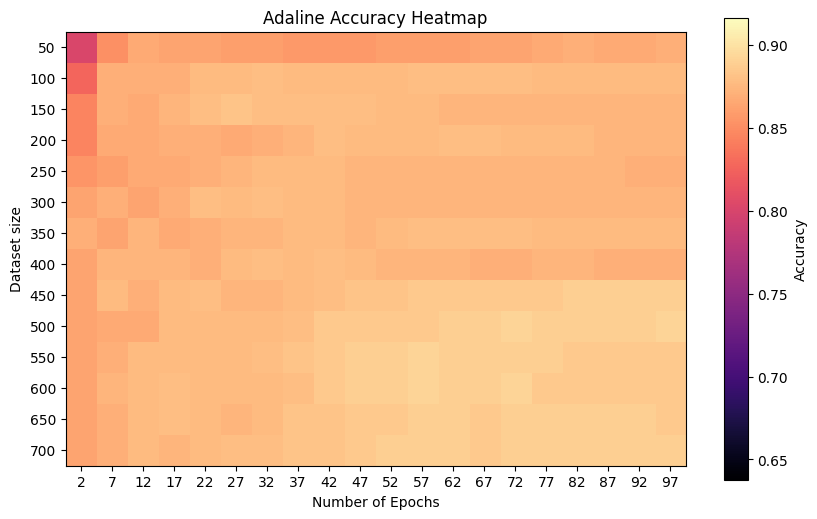

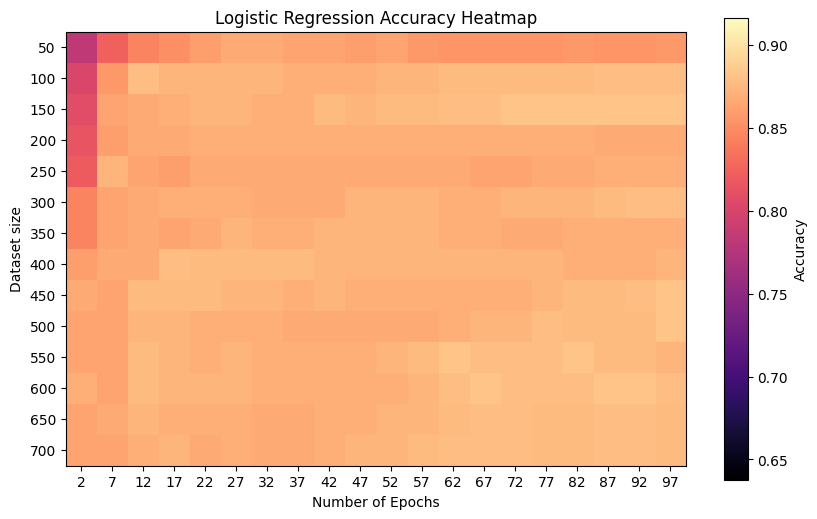

In [31]:

# compute the absolute min and max for the accurancies
min_accuracy = np.min([np.min(accuracy) for accuracy in all_accuracies])
max_accuracy = np.max([np.max(accuracy) for accuracy in all_accuracies])

classifiers = ['Perceptron', 'Adaline','Logistic Regression']
# Plot the heatmaps for each classifier
for idx in range(len(classifiers)):
    classifier_name = classifiers[idx]
    plt.figure(figsize=(10, 6))
    plt.imshow(all_accuracies[idx], cmap='magma')# change it to the color from the example plot
    plt.colorbar(label='Accuracy', ax=plt.gca())  # Make sure the color bar corresponds to the current axes
    plt.clim(min_accuracy, max_accuracy)  # Set the range of the color bar
    plt.title(f'{classifier_name} Accuracy Heatmap')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Dataset size')
    plt.xticks(np.arange(len(num_epochs)), num_epochs)
    plt.yticks(np.arange(len(dataset_sizes)), dataset_sizes)
    plt.show()


# Part V: Some more plotting

For the following cell to execute you need to have the variable `X_test_scaled` with all samples of the test set and the variable `y_test` with the corresponding labels.
Complete at least up until Part III. Executing the cell will plot something.

1. Add code comments explaining what the lines are doing.
2. What is the purpose of the plot?
    - vizualise the boundaries by logistic regression model for each pair of feature. The plots give an insight in how the classifier separated the two classes. 
3. Describe all components of the subplot and then comment in general on the entire plot. What does it show? What does it not show?
    - colored mesh: predicted probabilities belong to each class. darker blue belongs indicates to belong to class 1.
    - blue triangles: reperesent class 0
    - yellow circles: reperesent class 1
    - lines: the boundary where the probabilty is 0.5


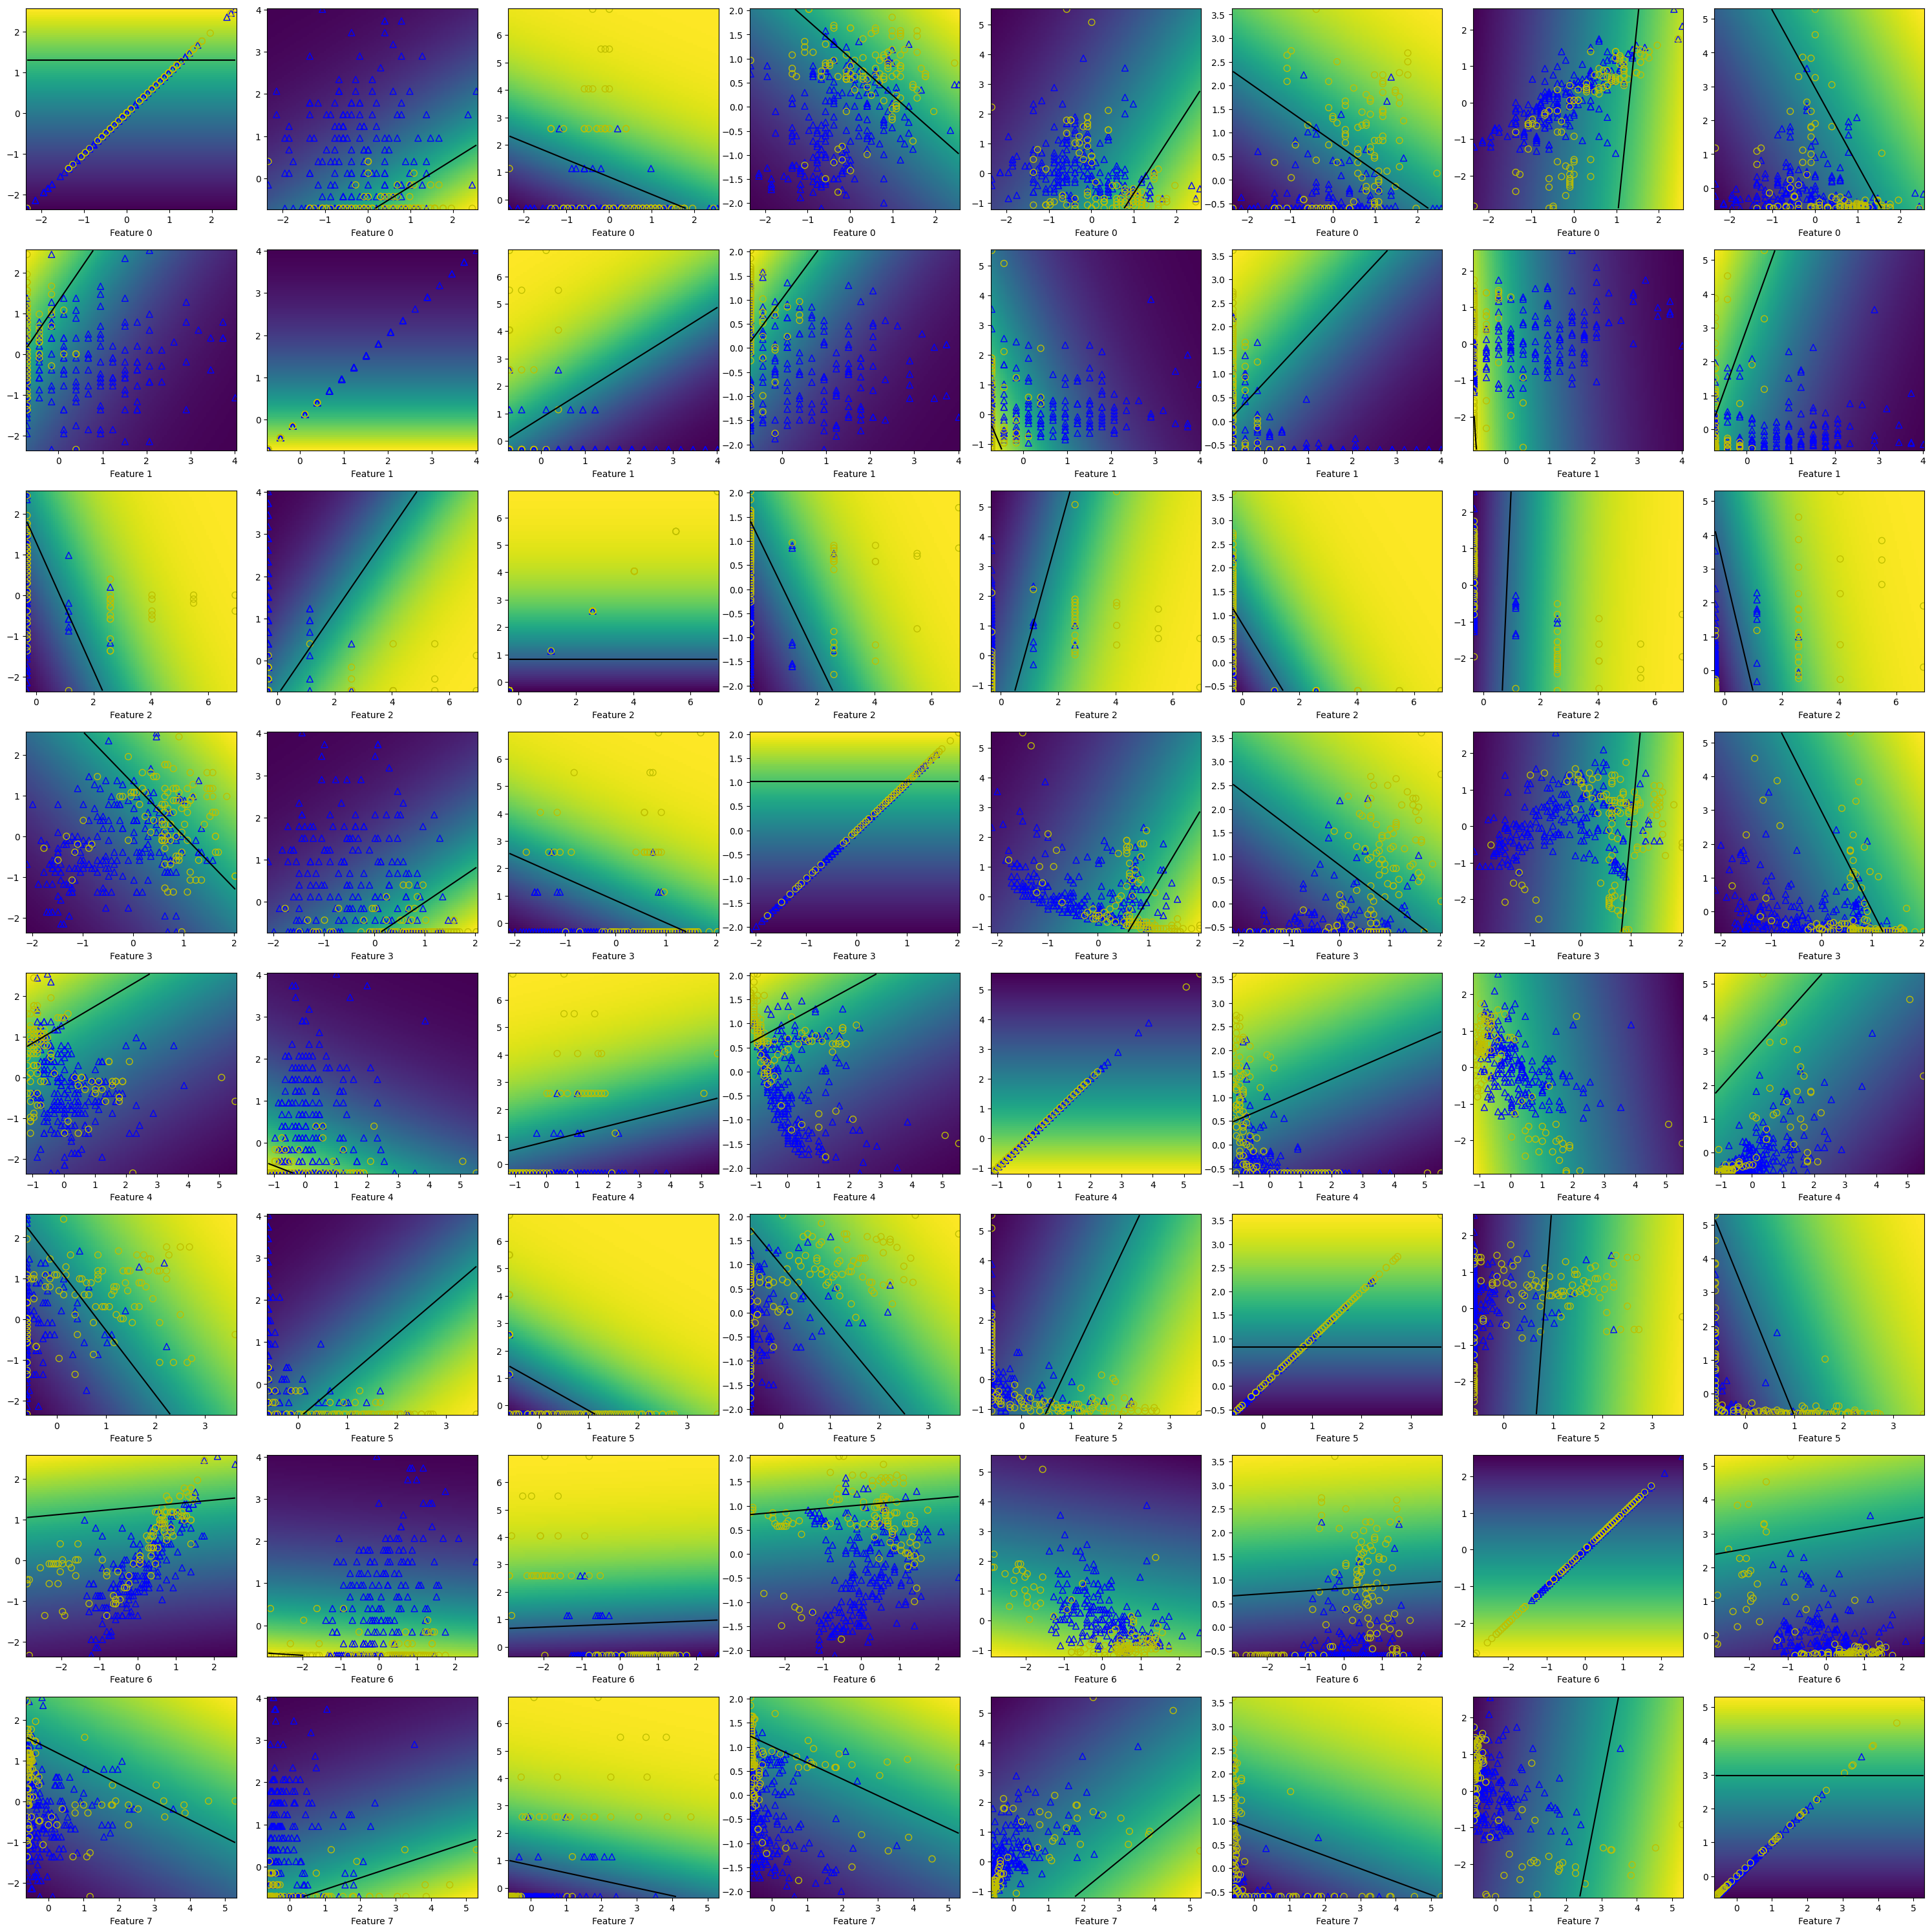

In [32]:
# Train and a logistic regression model with 300 epochs and learning rate 0.0001
clf = LogisticRegression(eta = 0.0001, epochs = 300, minibatches=1, random_seed=42) 
clf.fit(X_test_scaled, y_test) 

fig, axes = plt.subplots(8, 8, figsize=(30, 30)) # initalise for the subplots
for i in range(0, 8):
    for j in range(0, 8):
        feature_1 = i
        feature_2 = j
        ax = axes[i, j] # 

        #set labels for x-axis and y-axis
        ax.set_xlabel(f"Feature {feature_1}") 

        # calculate min and max value
        mins = X_test_scaled.min(axis=0)
        maxs = X_test_scaled.max(axis=0)

        # makes the plot look nice by .....
        x0 = np.linspace(mins[feature_1], maxs[feature_1], 100)
        x1 = np.linspace(mins[feature_2], maxs[feature_2], 100)

        # creates a meshgrid
        X0, X1 = np.meshgrid(x0, x1) # makes a meshgrid
        X_two_features = np.c_[X0.ravel(), X1.ravel()]
        X_plot = np.zeros(shape=(X_two_features.shape[0], X_test_scaled.shape[1])) # makes the plot with zeroes

        # give values to the plot
        X_plot[:, feature_1] = X_two_features[:, 0] 
        X_plot[:, feature_2] = X_two_features[:, 1]

        # predict the probability for a point in array
        y_pred = clf.predict_proba(X_plot)
        Z = y_pred.reshape(X0.shape)

        # makes the plot
        ax.pcolor(X0, X1, Z) # colored mesh
        ax.contour(X0, X1, Z, levels=[0.5], colors='k') # countour lines where the probability is 0.5
        ax.scatter(X_test_scaled[y_test == 0, feature_1], X_test_scaled[y_test == 0, feature_2], color="b", marker="^", s=50, facecolors="none")
        ax.scatter(X_test_scaled[y_test == 1, feature_1], X_test_scaled[y_test == 1, feature_2], color="y", marker="o", s=50, facecolors="none")

fig.tight_layout() # makes the layout look nice and that the subplots dont overlap
plt.show() # display the plot

## Part VI: Additional discussion

### Part I:
1. What kind of plots did you use to visualize the raw data, and why did you choose these types of plots?
    - I used histograms, because it makes it easy to see if it is normal distributed and how the raw data is distributed.

### Part II: 
1. What happens if we don't shuffle the training data before training the classifiers like in Part IV?
    - if we don´t shuffle the training data, it could lead to biased training. 
    - All the examples from 0 and some from 1 would end up in training dataset and the test dataset would only be with 1. 

2. How could you do the same train/test split (Point 1.-4.) using scikit-learn?
    - load the dataset with datasets.load
    - using train_test_split to split the dataset into separat training and testing sets
    - using standardScaler.fit from preprosessing to compjute the maean and sd for each festure and store this inside. the tranform to scale the other test and train, this to make sure data leakage doesnt happen.

### Part IV:
1. How does increasing the dataset size affect the performance of the logistic regression model? Provide a summary of your findings.
    - increasing the datasize set usually leads to better preformance, because it has more information and gets more to learn from. 
    - You can se this by looking at the heatmap for logistic regression bottom line, the accuracy is the best here, and it increase as the epoch size increase.

2. Describe the relationship between the number of epochs and model accuracy 
    - training with more epochs, gives the model more data to lean from, however it may lead to overfitting beacuse it memorizes the data. 
    - From the accurancy heatmaps you can se that for Adaline and Linear Regression, the accurancy increase with number of epochs. 

3. Which classifier is much slower to train and why do you think that is?
    - from the accuracys it looks like its the Perceptron. 
    - This is beacuse the percetion updates the weights after evaulating each training sample, and this takes a lot of time. 
    - Adaline calculateions is based on the whole trainingset, and therefor takes less time.

4. One classifier shows strong fluctuations in accuracy for different dataset sizes and number of epochs. Which one is it and why do you think this happens?
    - from the accuracy heatmaps it looks like its the Adaline classifier, this may be because of the Adaline rule(Widroff-Hoff rule). 
    - However, based on theory, it should have been linear Regression.